In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Implementação da DFT a partir do método de matrizes

Na matemática aplicada, uma matriz DFT é uma expressão de uma transformada discreta de Fourier (DFT) como uma matriz de transformação , que pode ser aplicada a um sinal através da multiplicação de matrizes.

**Definição:** Uma DFT de N pontos é expressa como a multiplicação $X = Wx$ onde $x$ é o sinal de entrada original, $W$ é a matriz DFT quadrada de ordem $NxN$ e $X$ é a DFT do sinal.

A matriz de transformação $W$ pode ser definida como $W=\left(\frac{\omega^{j k}}{\sqrt{N}}\right)_{j,k=0,...,N-1}$ ou equivalente,

$$W=\frac{1}{\sqrt{N}}\left[\begin{array}{l l l l l l}{{1}}&{{1}}&{{1}}&{{1}}&{{\cdot\cdot\cdot}}&{{1}}\\ {{1}}&{{\omega}}&{{\omega^{2}}}&{{\omega^{3}}}&{{\ldots}}&{{\omega^{N-1}}}\\ {{1}}&{{\omega^{2}}}&{{\omega^{4}}}&{{\omega^{6}}}&{{\ldots}}&{{\omega^{2(N-1)}}}\\ {{1}}&{{\omega^{3}}}&{{\omega^{6}}}&{{\omega^{9}}}&{{\ldots}}&{{\omega^{3(N-1)}}}\\ {{\vdots}}&{{\vdots}}&{{\vdots}}&{{\vdots}}&{{\ddots}}&{{\vdots}} \\ {{1}}&{{\omega^{N-1}}}&{{\omega^{2(N-1)}}}&{{\omega^{3(N-1)}}}&{{\cdots}}&{{\omega^{(N-1)(N-1)}}}\end{array}\right]$$

Onde $\omega = {e^{-2\pi i/N}}$

In [3]:
def isPowerOf2(NFFT):
    return (NFFT > 0) and ((NFFT & (NFFT - 1)) == 0)

def DFT(signal, NFFT):
    """
    Aluno: Lucas Rodrigues Albino.
    Implementação da transformada de Fourier discreta pelo método das matrizes.
    """

    if NFFT < signal.size:
        NFFT = signal.size

    if isPowerOf2(NFFT) == False:
        NFFT = signal.size

    # define a constante ω
    ω = np.exp((-2*np.pi*1j)/NFFT)

    # define a matriz W
    W = np.zeros((NFFT, NFFT), dtype="complex")

    for j in range(NFFT):
        for k in range(NFFT):
            W[j][k] = np.power(ω, j*k) * 1/np.sqrt(NFFT)

    dft = np.matmul(W, signal.T)

    return dft

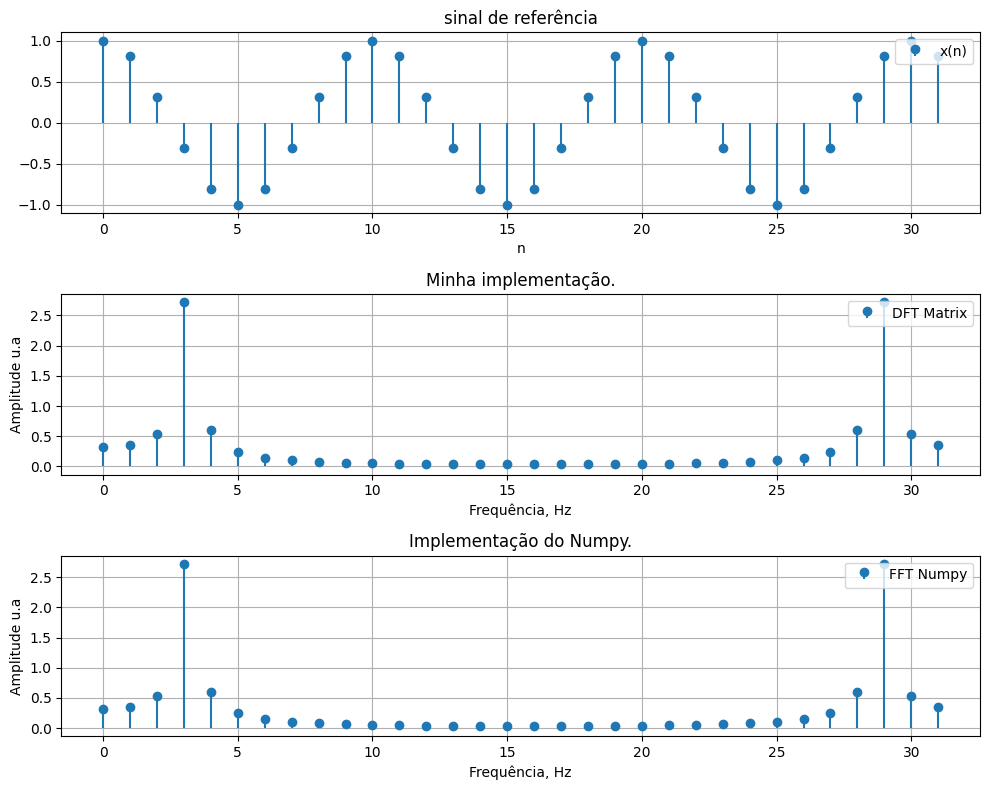

In [4]:
# define um sinal de referência
def func(n):
    return np.cos(2*np.pi*n/10)

NFFT = 32
n = np.arange(0, NFFT)

figure, ax = plt.subplots(3, 1, figsize=(10, 8))

# função a ser calculada a transformada
ax[0].stem(func(n), basefmt=" ", label = 'x(n)')
ax[0].grid(True)
ax[0].set_xlabel('n')
ax[0].set_title('sinal de referência')
ax[0].legend(loc = 'upper right')

# minha implementação
ax[1].stem(n, np.abs(DFT(func(n), NFFT)), basefmt=" ", label='DFT Matrix')
ax[1].set_xlabel('Frequência, Hz')
ax[1].set_ylabel('Amplitude u.a')
ax[1].set_title('Minha implementação.')
ax[1].legend(loc = 'upper right')
ax[1].grid(True)

# implementação do numpy
ax[2].stem(n, np.abs(np.fft.fft(func(n)))/np.sqrt(NFFT), basefmt=" ", label='FFT Numpy')
ax[2].set_xlabel('Frequência, Hz')
ax[2].set_ylabel('Amplitude u.a')
ax[2].set_title('Implementação do Numpy.')
ax[2].legend(loc = 'upper right')
ax[2].grid(True)

plt.tight_layout()

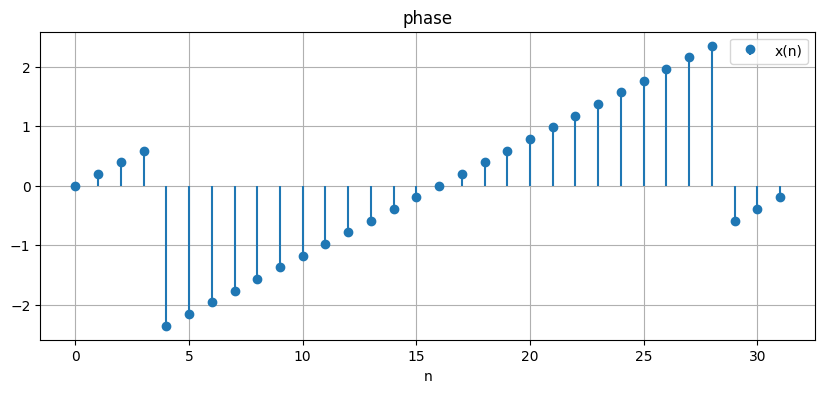

In [5]:
plt.figure(figsize=(10, 4))
plt.stem(np.angle(DFT(func(n), NFFT)), basefmt=" ", label = 'x(n)')
plt.grid(True)
plt.xlabel('n')
plt.title('phase')
plt.legend(loc = 'upper right');

# Referências

[[1] DFT Implementation](https://en.wikipedia.org/wiki/DFT_matrix)